In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

计算正常航班的

    print('计划耗时：',normal.loc[1]['计划到达时间']-normal.loc[1]['计划起飞时间'])
    print('实际耗时：',normal.loc[1]['实际到达时间']-normal.loc[1]['实际起飞时间'])
    print('起飞延误：',normal.loc[1]['实际起飞时间']-normal.loc[1]['计划起飞时间'])
    print('到达延误：',normal.loc[1]['实际到达时间']-normal.loc[1]['计划到达时间'])

In [3]:
train1 = pd.read_csv('训练集/2015年5月到2017年5月城市天气.csv')
train2 = pd.read_csv('训练集/2015年5月到2017年5月航班动态数据.csv',encoding='gbk')

/Users/linzhun/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
city = pd.read_excel('训练集/机场城市对应表.xlsx')

In [5]:
cancel = train2[train2['航班是否取消']=='取消']

In [6]:
cancel['yw'] = 1

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
normal = train2.drop(cancel.index)

In [8]:
normal['计划耗时'] = normal['计划到达时间']-normal['计划起飞时间']
normal['实际耗时'] = normal['实际到达时间']-normal['实际起飞时间']
normal['起飞延误'] = normal['实际起飞时间']-normal['计划起飞时间']
normal['到达延误'] = normal['实际到达时间']-normal['计划到达时间']

In [9]:
delay = normal[normal['起飞延误'] > 10800] # 自动排除了null值

In [10]:
delay['yw'] = 1

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


### 非正文，到达延误与起飞延误的关系？填充缺失值

(3, 14)

(3, 16)

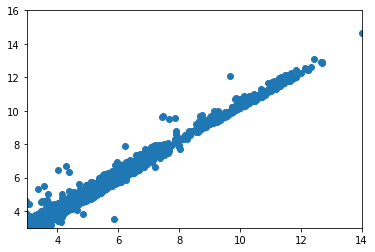

In [15]:
plt.scatter(delay['起飞延误']/10800,delay['到达延误']/10800)
plt.xlim(3,14)
plt.ylim(3,16)

In [24]:
undelay=normal[normal['起飞延误'] <= 10800]
undelay['ys'] = 0
undelay[['计划耗时','实际耗时','起飞延误','到达延误']].describe()

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,计划耗时,实际耗时,起飞延误,到达延误
count,6.964103e+06,6.964103e+06,6.964103e+06,6.964103e+06
mean,7.820250e+03,6.578532e+03,1.628058e+03,3.863395e+02
std,2.802480e+03,2.707550e+03,2.033509e+03,2.254875e+03
min,-2.280000e+04,-2.442000e+04,-6.456000e+04,-8.490000e+04
25%,5.700000e+03,4.680000e+03,3.600000e+02,-9.600000e+02
50%,7.800000e+03,6.300000e+03,9.600000e+02,-2.400000e+02
75%,9.600000e+03,8.040000e+03,2.100000e+03,9.600000e+02
max,1.257000e+05,1.138200e+05,1.080000e+04,9.294000e+04


In [18]:
train2.shape
normal.shape
delay.shape
undelay.shape
cancel.shape

(7518638, 9)

(7195285, 13)

(229466, 14)

(6964103, 14)

(323353, 10)

## 正文
## 至此，只考虑以下数据集

In [31]:
delay.shape[0]
cancel.shape[0]
undelay.shape[0]

delay.head()
cancel.head()
undelay.head()

229466

323353

6964103

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,计划耗时,实际耗时,起飞延误,到达延误,ys
72,CKG,SZX,ZH991T,1453604100,1453611300,1.453643e+09,1.453649e+09,71.0,正常,7200,6240.0,38520.0,37560.0,1
74,CAN,NNY,CZ3221,1452998400,1453006500,1.453013e+09,1.453019e+09,73.0,正常,8100,5940.0,14880.0,12720.0,1
153,LHW,HGH,CZ6951,1452060900,1452069600,1.452084e+09,1.452092e+09,148.0,正常,8700,7860.0,23160.0,22320.0,1
201,HET,DSN,G52840,1453640100,1453642500,1.453657e+09,1.453659e+09,194.0,正常,2400,1800.0,16980.0,16380.0,1
209,SHA,KHN,MU7154,1454237700,1454241300,1.454254e+09,1.454259e+09,200.0,正常,3600,4440.0,16680.0,17520.0,1


,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,yw
5,DLC,NNG,ZH953Z,1452385800,1452401700,NaN,NaN,6.0,取消,1
6,HGH,SZX,CZ6327,1452591900,1452600900,NaN,NaN,NaN,取消,1
55,HAK,SZX,HU7013,1452032700,1452037500,NaN,NaN,55.0,取消,1
78,WUX,SZX,MF1094,1452855300,1452864900,NaN,NaN,NaN,取消,1
98,CAN,URC,CZ6884,1453976100,1453996200,NaN,NaN,NaN,取消,1


,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,计划耗时,实际耗时,起飞延误,到达延误,ys
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,7500,6300.0,3480.0,2280.0,0
1,SHA,XMN,FM9261,1452760800,1452767100,1.452763e+09,1.452768e+09,2.0,正常,6300,5340.0,1800.0,840.0,0
2,CAN,WNZ,ZH9597,1453800900,1453807500,1.453802e+09,1.453807e+09,3.0,正常,6600,4500.0,1440.0,-660.0,0
3,SHA,ZUH,9C8819,1452120600,1452131100,1.452121e+09,1.452130e+09,4.0,正常,10500,8400.0,840.0,-1260.0,0
4,SHE,TAO,TZ185,1452399000,1452406800,1.452400e+09,1.452404e+09,5.0,正常,7800,4440.0,900.0,-2460.0,0


# 正文 城市天气表
## 数据探索

In [11]:
train1=train1.drop('Unnamed: 5',axis=1) 

In [12]:
train1 = train1.drop(['最低气温','最高气温'],axis=1)  #天气表的缺失值处理，删除该列（特征）
train1.isnull().sum()

城市     0
天气    70
日期     0
dtype: int64

In [13]:
city = pd.read_excel('机场城市对应表.xlsx',names=['机场编码','城市'])

In [14]:
len(train1['城市'].unique())
city.shape[0]

2268

234

In [15]:
d1 = train1.merge(city,how='left',on='城市')

In [16]:
d1.head()

,城市,天气,日期,机场编码
0,厦门,阴,2015-05-01,XMN
1,宁德,阵雨,2015-05-01,NaN
2,莆田,阵雨转阴,2015-05-01,NaN
3,泉州,阴,2015-05-01,NaN
4,漳州,阵雨转阴,2015-05-01,NaN


In [17]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830769 entries, 0 to 830768
Data columns (total 4 columns):
城市      830769 non-null object
天气      830699 non-null object
日期      830769 non-null object
机场编码    148892 non-null object
dtypes: object(4)
memory usage: 31.7+ MB


In [78]:
train1.shape
train2.shape
city.shape

(828469, 3)

(7518638, 9)

(234, 2)

# 非正文
### train3 数据缺失探索，删除即可

In [18]:
train3_na = pd.read_excel('训练集/2015年5月到2017年5月特情.xlsx',encoding='gbk')

In [19]:
train3_na[train3_na['特情机场'].isnull()].index.values

array([5045, 5047, 6995])

In [20]:
train3_na[train3_na['特情机场'].isnull()].index.values
train3_na[train3_na['收集时间'].isnull()].index.values
train3_na[train3_na['开始时间'].isnull()].index.values
train3_na[train3_na['结束时间'].isnull()].index.values
train3_na[train3_na['特情内容'].isnull()].index.values

array([5045, 5047, 6995])

array([3279, 3988, 5045, 5046, 5047, 5048, 6042, 6043, 6044, 6995, 6996])

array([3279, 3988, 5045, 5046, 5047, 5048, 6042, 6043, 6044, 6995, 6996])

array([ 1036,  3279,  3988,  5045,  5046,  5047,  5048,  6042,  6043,
        6044,  6995,  6996,  8058,  8538,  8808, 11917, 12347, 13733])

array([3246, 3279, 3988, 5045, 5046, 5047, 5048, 6042, 6043, 6044, 6995,
       6996])

In [123]:
train3 = pd.read_excel('训练集/2015年5月到2017年5月特情.xlsx',encoding='gbk',keep_default_na=False)

In [157]:
train3.loc[[5045, 5047, 6995,3279, 3988, 5045, 5046, 5047, 5048, 6042, 6043, 6044, 6995, 6996,
           1036,  3279,  3988,  5045,  5046,  5047,  5048,  6042,  6043,
        6044,  6995,  6996,  8058,  8538,  8808, 11917, 12347, 13733]]

,特情机场,收集时间,开始时间,结束时间,特情内容
5045,,,,,
5047,,,,,
6995,,,,,
3279,，期间进出港航班可能受到影响。,,,,
3988,期间进出港航班可能受到影响。,,,,
5045,,,,,
5046,2、尽量搭乘地铁前往机场，地铁三号线北延线可直通航站楼；,,,,
5047,,,,,
5048,3、需自驾前往机场的旅客，如遇塞车请避开机场高速，绕行106国道来机场；此外，也可经广花...,,,,
6042,旅客接收到的格式将是：,,,,


## 正文 特情表

In [21]:
train3=train3_na.dropna()  # 删除缺失值行

In [22]:
train3['机场']=train3['特情机场'].map(lambda x:np.where(x.isalpha,x.upper(),'NNN'))

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [177]:
train3.head()

,特情机场,收集时间,开始时间,结束时间,特情内容,机场
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...,CSX
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8时-12时雷雨，期间进出港航班可能受到影响。,WUH
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,预计，14时-17时小雷雨，期间进出港航班可能受到影响。,KHN
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。,SWA
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。,ZHA


## 缺失值问题： 暂时忽略
     机场编号问题；
     到达延误能否推出起飞延误？


# 正文 基于以下表

In [25]:
delay.head(1)
cancel.head(1)
undelay.head(1)

weather = d1
weather.head(1)
train3.head(1)

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,计划耗时,实际耗时,起飞延误,到达延误,yw
72,CKG,SZX,ZH991T,1453604100,1453611300,1.453643e+09,1.453649e+09,71.0,正常,7200,6240.0,38520.0,37560.0,1


,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,yw
5,DLC,NNG,ZH953Z,1452385800,1452401700,NaN,NaN,6.0,取消,1


,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,计划耗时,实际耗时,起飞延误,到达延误,ys
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,7500,6300.0,3480.0,2280.0,0


,城市,天气,日期,机场编码
0,厦门,阴,2015-05-01,XMN


,特情机场,收集时间,开始时间,结束时间,特情内容,机场
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...,CSX


正文：日期转换为unix timestamp

In [26]:
weather['日期']=pd.to_datetime(weather['日期']).apply(lambda x: x.timestamp())

In [27]:
weather.head(1)

,城市,天气,日期,机场编码
0,厦门,阴,1.430410e+09,XMN


In [28]:
train3.loc[15863] # 开始即结束

特情机场                     dcy
收集时间    2017-05-25 08:19:24Z
开始时间    2017-05-25 07:32:00Z
结束时间    2017-05-25 07:32:00Z
特情内容                    跑道开放
机场                       DCY
Name: 15863, dtype: object

In [29]:
train3['结束时间']=pd.to_datetime(train3['结束时间']).apply(lambda x : x.timestamp())
train3['开始时间']=pd.to_datetime(train3['开始时间']).apply(lambda x : x.timestamp())

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [30]:
train3['收集时间']=pd.to_datetime(train3['收集时间']).apply(lambda x: x.timestamp())

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [31]:
train3['持续时长']=train3['结束时间']-train3['开始时间']
train3['持续时长'].describe()

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


count    1.586100e+04
mean     1.713182e+04
std      1.314375e+05
min     -2.667600e+06
25%      7.200000e+03
50%      1.080000e+04
75%      1.800000e+04
max      9.503940e+06
Name: 持续时长, dtype: float64

# 正文：整理出训练集

## df1

In [32]:
delay.head(1)
delay.isnull().sum()

df1 = delay.drop(['飞机编号'],axis=1)
df1['航班是否取消'] = 0  # 不取消，正常 为0
df1.head(1)
df1.shape
df1.isnull().sum()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,计划耗时,实际耗时,起飞延误,到达延误,yw
72,CKG,SZX,ZH991T,1453604100,1453611300,1.453643e+09,1.453649e+09,71.0,正常,7200,6240.0,38520.0,37560.0,1


出发机场        0
到达机场        0
航班编号        0
计划起飞时间      0
计划到达时间      0
实际起飞时间      0
实际到达时间      0
飞机编号      866
航班是否取消      0
计划耗时        0
实际耗时        0
起飞延误        0
到达延误        0
yw          0
dtype: int64

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,航班是否取消,计划耗时,实际耗时,起飞延误,到达延误,yw
72,CKG,SZX,ZH991T,1453604100,1453611300,1.453643e+09,1.453649e+09,0,7200,6240.0,38520.0,37560.0,1


(229466, 13)

出发机场      0
到达机场      0
航班编号      0
计划起飞时间    0
计划到达时间    0
实际起飞时间    0
实际到达时间    0
航班是否取消    0
计划耗时      0
实际耗时      0
起飞延误      0
到达延误      0
yw        0
dtype: int64

## df2

In [33]:
cancel.head(2)
cancel.shape
cancel.isnull().sum()

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,yw
5,DLC,NNG,ZH953Z,1452385800,1452401700,NaN,NaN,6.0,取消,1
6,HGH,SZX,CZ6327,1452591900,1452600900,NaN,NaN,NaN,取消,1


(323353, 10)

出发机场           0
到达机场           0
航班编号           0
计划起飞时间         0
计划到达时间         0
实际起飞时间    321886
实际到达时间    323124
飞机编号      164897
航班是否取消         0
yw             0
dtype: int64

### 如何填充缺失值？

    填0
    填计划起飞时间+10800
    填delay的均值？

In [34]:
cancel['实际起飞时间']= -1
cancel['实际到达时间']= -1
cancel['计划耗时'] = cancel['计划到达时间']-cancel['计划起飞时间']
cancel['实际耗时'] = cancel['实际到达时间']-cancel['实际起飞时间']
cancel['起飞延误'] = cancel['实际起飞时间']-cancel['计划起飞时间']
cancel['到达延误'] = cancel['实际到达时间']-cancel['计划到达时间']

df2 = cancel.drop(['飞机编号'],axis=1)
df2['航班是否取消'] = 1  # 不取消，正常 为0
df2.head(1)
df2.shape
df2.isnull().sum()

/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/linzhun/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,航班是否取消,yw,计划耗时,实际耗时,起飞延误,到达延误
5,DLC,NNG,ZH953Z,1452385800,1452401700,-1,-1,1,1,15900,0,-1452385801,-1452401701


(323353, 13)

出发机场      0
到达机场      0
航班编号      0
计划起飞时间    0
计划到达时间    0
实际起飞时间    0
实际到达时间    0
航班是否取消    0
yw        0
计划耗时      0
实际耗时      0
起飞延误      0
到达延误      0
dtype: int64

In [35]:
df1.describe()
df2.describe()

,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,航班是否取消,计划耗时,实际耗时,起飞延误,到达延误,yw
count,2.294660e+05,2.294660e+05,2.294660e+05,2.294660e+05,229466.0,229466.00000,229466.000000,229466.000000,229466.000000,229466.0
mean,1.460416e+09,1.460425e+09,1.460434e+09,1.460441e+09,0.0,8131.98147,6844.344173,17485.316696,16197.679399,1.0
std,2.028851e+07,2.028885e+07,2.028757e+07,2.028782e+07,0.0,3045.51888,3166.501644,8989.817822,9335.863556,0.0
min,1.430410e+09,1.430410e+09,1.430447e+09,1.430455e+09,0.0,-6300.00000,-84600.000000,10860.000000,-41280.000000,1.0
25%,1.438950e+09,1.438958e+09,1.438966e+09,1.438972e+09,0.0,6300.00000,5100.000000,12420.000000,11160.000000,1.0
50%,1.461600e+09,1.461603e+09,1.461639e+09,1.461632e+09,0.0,8100.00000,6600.000000,14760.000000,13500.000000,1.0
75%,1.477859e+09,1.477877e+09,1.477876e+09,1.477891e+09,0.0,9900.00000,8280.000000,19260.000000,18000.000000,1.0
max,1.496240e+09,1.496251e+09,1.496259e+09,1.496270e+09,0.0,97200.00000,95040.000000,154980.000000,159900.000000,1.0


,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,航班是否取消,yw,计划耗时,实际耗时,起飞延误,到达延误
count,3.233530e+05,3.233530e+05,323353.0,323353.0,323353.0,323353.0,3.233530e+05,323353.0,3.233530e+05,3.233530e+05
mean,1.460772e+09,1.460772e+09,-1.0,-1.0,1.0,1.0,-2.993185e+02,0.0,-1.460772e+09,-1.460772e+09
std,1.919084e+07,1.953236e+07,0.0,0.0,0.0,0.0,3.571305e+06,0.0,1.919084e+07,1.953236e+07
min,1.430410e+09,8.640000e+04,-1.0,-1.0,1.0,1.0,-1.436282e+09,0.0,-1.496243e+09,-1.496253e+09
25%,1.443507e+09,1.443514e+09,-1.0,-1.0,1.0,1.0,5.700000e+03,0.0,-1.478778e+09,-1.478786e+09
50%,1.459899e+09,1.459906e+09,-1.0,-1.0,1.0,1.0,7.800000e+03,0.0,-1.459899e+09,-1.459907e+09
75%,1.478778e+09,1.478786e+09,-1.0,-1.0,1.0,1.0,9.900000e+03,0.0,-1.443507e+09,-1.443514e+09
max,1.496243e+09,1.496253e+09,-1.0,-1.0,1.0,1.0,1.038000e+05,0.0,-1.430410e+09,-8.640100e+04


## df3

In [244]:
undelay.head(1)

,出发机场,到达机场,航班编号,计划起飞时间,计划到达时间,实际起飞时间,实际到达时间,飞机编号,航班是否取消,计划耗时,实际耗时,起飞延误,到达延误,ys
0,HGH,DLC,CZ6328,1453809600,1453817100,1.453813e+09,1.453819e+09,1.0,正常,7500,6300.0,3480.0,2280.0,0


In [36]:
df3 = undelay.drop(['飞机编号'],axis=1)
df3.shape

(6964103, 13)

In [37]:
pd.concat([df1,df2,df3])

,ys,yw,出发机场,到达延误,到达机场,实际到达时间,实际耗时,实际起飞时间,航班是否取消,航班编号,计划到达时间,计划耗时,计划起飞时间,起飞延误
72,NaN,1.0,CKG,37560.0,SZX,1.453649e+09,6240.0,1.453643e+09,0,ZH991T,1453611300,7200,1453604100,38520.0
74,NaN,1.0,CAN,12720.0,NNY,1.453019e+09,5940.0,1.453013e+09,0,CZ3221,1453006500,8100,1452998400,14880.0
153,NaN,1.0,LHW,22320.0,HGH,1.452092e+09,7860.0,1.452084e+09,0,CZ6951,1452069600,8700,1452060900,23160.0
201,NaN,1.0,HET,16380.0,DSN,1.453659e+09,1800.0,1.453657e+09,0,G52840,1453642500,2400,1453640100,16980.0
209,NaN,1.0,SHA,17520.0,KHN,1.454259e+09,4440.0,1.454254e+09,0,MU7154,1454241300,3600,1454237700,16680.0
213,NaN,1.0,HTN,15900.0,URC,1.453457e+09,5520.0,1.453452e+09,0,CZ6814,1453441200,6000,1453435200,16380.0
287,NaN,1.0,KMG,12540.0,LJG,1.453800e+09,3240.0,1.453797e+09,0,MU5716,1453787400,3000,1453784400,12300.0
328,NaN,1.0,CKG,12900.0,SYX,1.452287e+09,7200.0,1.452280e+09,0,PN6223,1452274200,8700,1452265500,14400.0
366,NaN,1.0,CTU,10140.0,KHN,1.451807e+09,6240.0,1.451801e+09,0,ZH9380,1451797200,7800,1451789400,11700.0
381,NaN,1.0,URC,17820.0,YIN,1.453130e+09,3540.0,1.453126e+09,0,GS7537,1453112100,4500,1453107600,18780.0


# 如何考虑“计划起飞前2小时”？